#GIỚI THIỆU BÀI TOÁN
**Chúng em sẽ sử dụng tập dữ liệu Titanic kết hợp với mô hình Logistic Regression trong Python để dự đoán xem liệu một hành khách có sống sót sau vụ tai nạn tàu Titanic hay không.**

#KHAI BÁO THƯ VIỆN VÀ ĐỌC DỮ LIỆU

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
titanic_data = pd.read_csv('train.csv')

#XỬ LÍ VÀ TRỰC QUAN HÓA DỮ LIỆU

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##Dùng thư viện seasborn 

###Tỷ lệ những người sống sót.

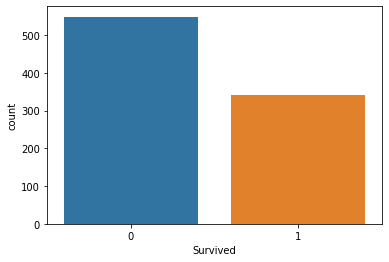

In [ ]:
sns.countplot(x='Survived', data=titanic_data)

###Tỷ lệ giới tính của những người sống sót

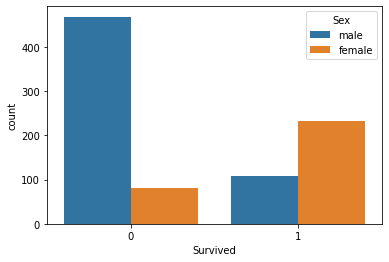

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

###Tỷ lệ hạng hành khách

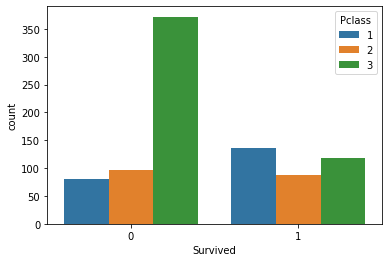

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

##THƯ VIỆN MATPLOTLIB

###Phân bố tuổi của các hành khác trên tàu.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

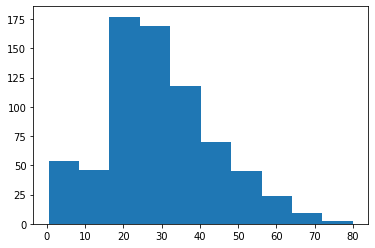

In [ ]:
plt.hist(titanic_data['Age'].dropna())

###Phân bố giá vé của các hành khách 

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

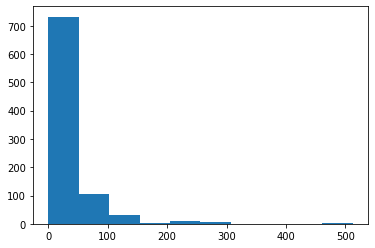

In [ ]:
plt.hist(titanic_data['Fare'])

In [ ]:
titanic_data.isnull()#ô chứa True nếu nó là giá trị null và False ngược lại

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##XÓA DỮ LIỆU RỖNG VÀ THÊM DỮ LIỆU AGE CÒN THIẾU 

###Trực quan hóa dữ liệu còn thiếu bằng seaborn

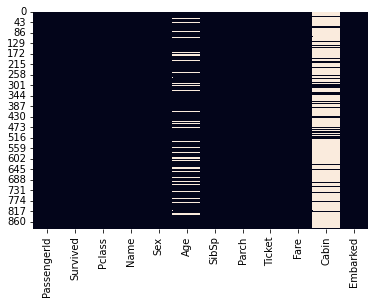

In [ ]:
sns.heatmap(titanic_data.isnull(), cbar=False) 
#Các đường màu trắng cho biết các giá trị bị thiếu trong tập dữ liệu
#Cột Age thiếu ít nên ta có thể dụng imputation để thêm vào.
#Cột Cabin thiếu hầu hết dữ liệu nên ta có thể xóa nó đi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


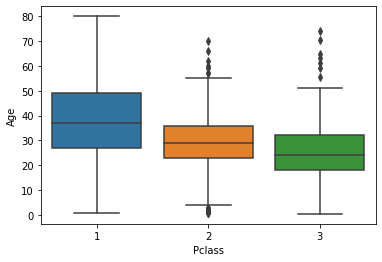

In [ ]:
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

In [ ]:
#Xác định độ tuổi trung bình cho từng hạng
#Pclass value 1

titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

#Pclass value 2

titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

#Pclass 3

titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()


29.87763005780347

###Thêm dữ liệu Age còn thiếu

In [ ]:
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

        

    else:

        return age


In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

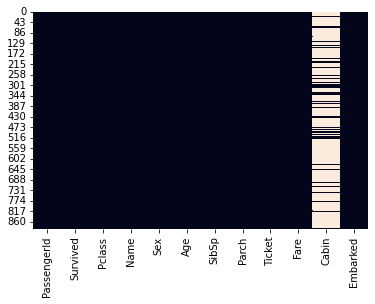

In [ ]:
sns.heatmap(titanic_data.isnull(), cbar=False)
#Dữ liệu cột age đã đầy đủ

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace = True) #Xóa cột cabin

In [ ]:
titanic_data.dropna(inplace = True)# Xóa bất kỳ cột bổ sung nào chứa dữ liệu bị thiếu

In [ ]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
pd.get_dummies(titanic_data['Sex'], drop_first = True)


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [ ]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

In [ ]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [ ]:
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [ ]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')


#BUILD MODEL

In [ ]:
y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)


In [ ]:
y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)


In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_training_data, y_training_data)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = model.predict(x_test_data)

In [ ]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       161
           1       0.79      0.69      0.74       106

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267

